#  <span style="color:#cc416d"> Lectura de CSV, con mapas base y AOL </span>


In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import os, glob 
import pandas as pd
import numpy as np
import geopandas as gpd
import contextily as ctx
from pyproj import Transformer
from matplotlib.ticker import FixedLocator  # ✅ Importación necesaria

In [7]:
# 📂 Rutas
path = "C:/Proyectos/2024/Conejos/mapas"
os.chdir(path)
print ("Ruta de trabajo:   " + path)

ruta_csv = r"C:/Proyectos/2024/Conejos/mapas/pozos.csv"
print ("\U0001F40D")

Ruta de trabajo:   C:/Proyectos/2024/Conejos/mapas
🐍


In [8]:
carpeta_salida = "C:/Proyectos/2024/Conejos/mapas/interpolados"
print (carpeta_salida)

C:/Proyectos/2024/Conejos/mapas/interpolados


In [9]:
# 📌 Configuración
campo_x = "x_nad27"
campo_y = "y_nad27"
anios = [2005, 2006, 2007, 2009, 2010, 2011, 2012, 2015, 2016, 2017, 2018] ##

###  <span style="color:#cc416d"> Lectura de la tabla </span>

In [10]:
# 📥 Leer CSV con Pandas
df = pd.read_csv(ruta_csv)

In [31]:
df

,Unnamed: 0,clv,tipo,uso,regimen,x_nad27,y_nad27,z_gps,z_carta,brocal,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,0,CM-001,Pozo,1,1,347399,3516542,1248,1273.0,65.0,...,49.12,NaN,NaN,51.28,NaN,NaN,51.25,52.14,52.87,53.25
1,1,CM-001B,Pozo,1,1,347130,3517209,1258,1271.0,37.0,...,54.12,NaN,NaN,56.30,NaN,NaN,56.24,56.87,57.20,52.24
2,2,CM-002,Pozo,1,3,347668,3515888,1254,1274.0,NaN,...,57.57,NaN,NaN,59.35,NaN,NaN,60.24,60.87,61.21,61.28
3,3,CM-003,Pozo,2,3,342798,3490331,1283,1252.0,35.0,...,72.19,NaN,73.29,74.25,NaN,NaN,74.80,74.60,74.98,74.12
4,4,CM-006,Pozo,3,3,351797,3498719,1307,1299.0,51.0,...,132.20,133.18,133.98,134.58,NaN,NaN,134.89,134.98,135.68,136.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,152,CM-166,Pozo,8,1,327801,3508308,1255,1255.0,64.0,...,90.37,94.90,NaN,95.05,NaN,NaN,96.35,96.94,NaN,97.05
153,153,CM-167,Pozo,8,1,330958,3508631,1259,1259.0,73.0,...,NaN,NaN,NaN,39.97,NaN,NaN,40.14,40.16,40.87,40.90
154,154,CM-168,Pozo,8,1,330938,3504118,1257,1257.0,68.0,...,95.95,96.58,97.12,97.89,NaN,NaN,98.10,98.78,99.10,99.14
155,155,CM-169,Pozo,8,1,325540,3505987,1252,1252.0,54.0,...,89.74,89.75,90.06,91.20,NaN,NaN,92.87,93.82,93.98,94.51


In [33]:
# Crear geometría a partir de coordenadas en NAD27 / UTM zona 13N (EPSG:26713)
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['x_nad27'], df['y_nad27']),
    crs='EPSG:26713'  # NAD27 / UTM zone 13N
)

###  <span style="color:#cc416d">Ploteo de puntos con ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)  # Calles </span>

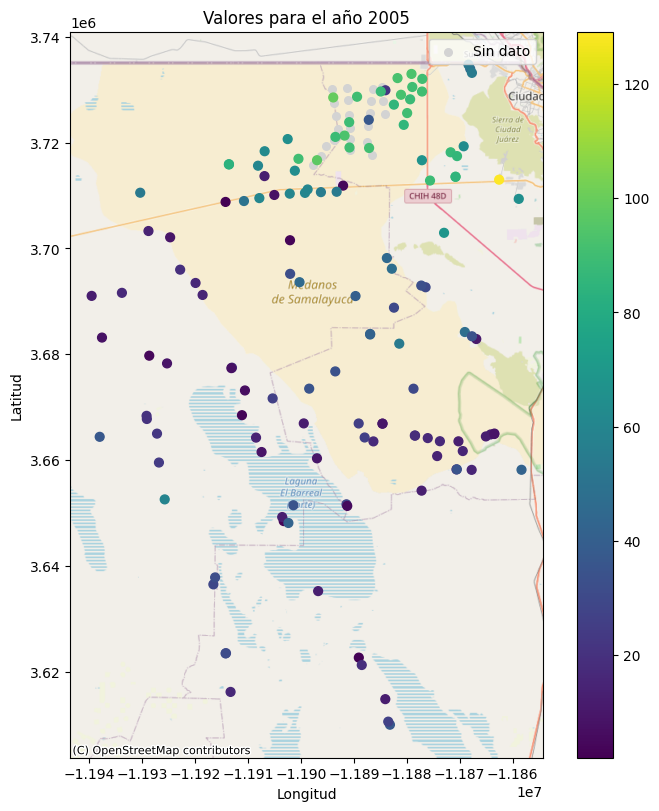

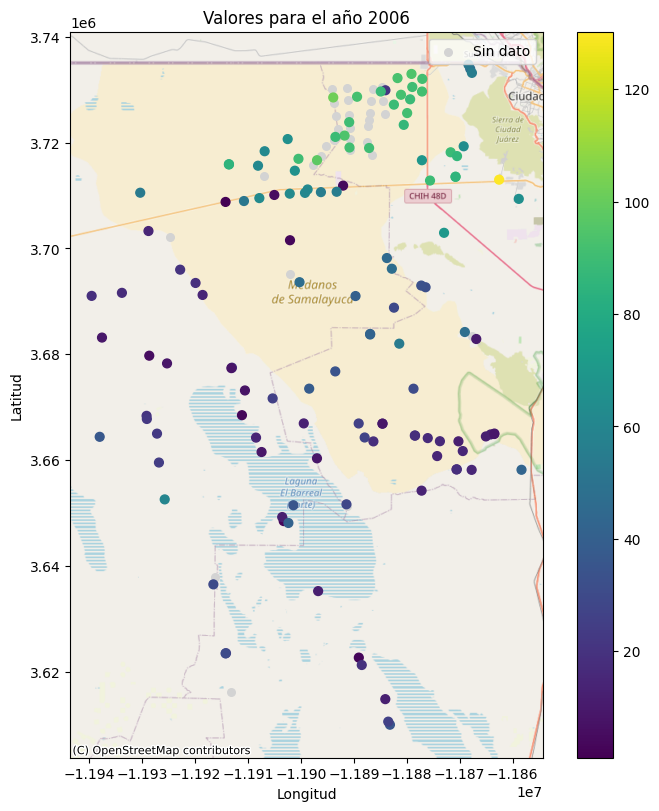

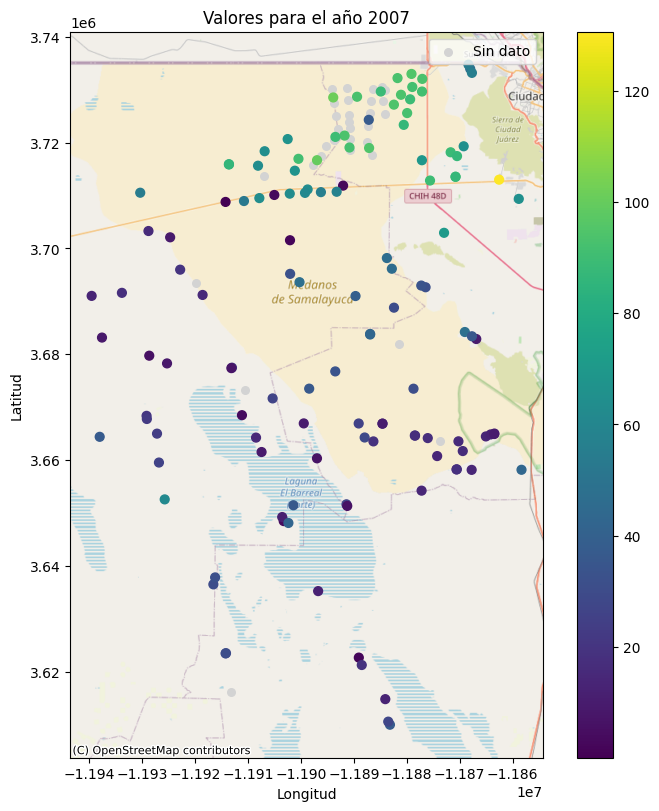

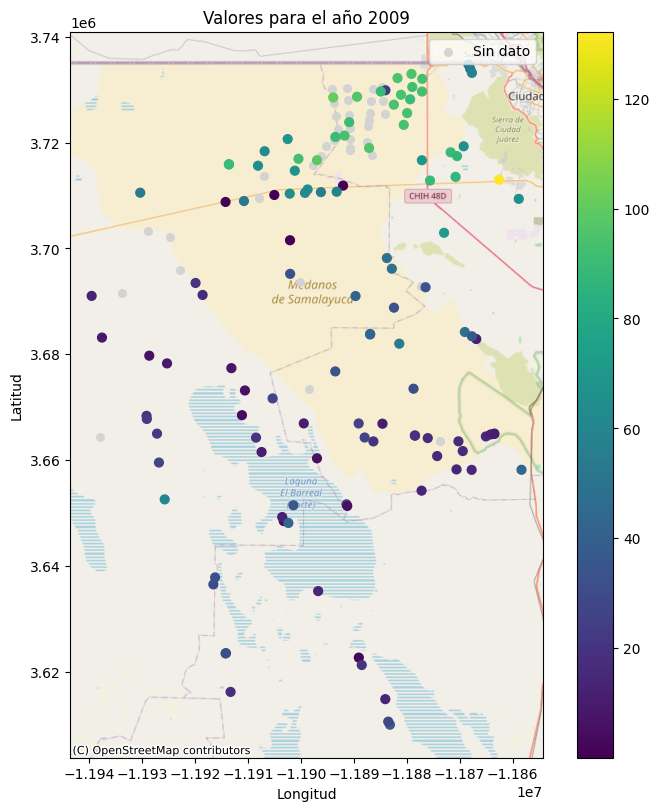

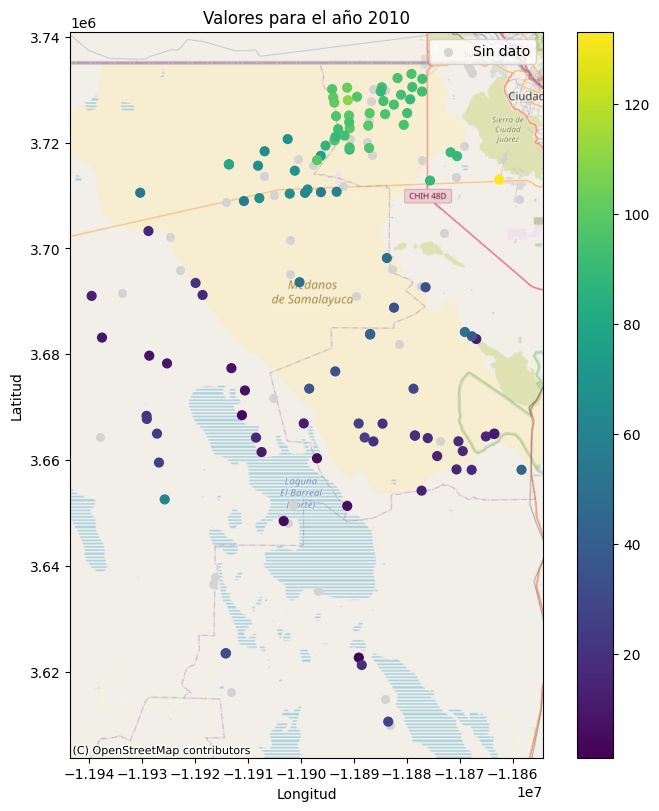

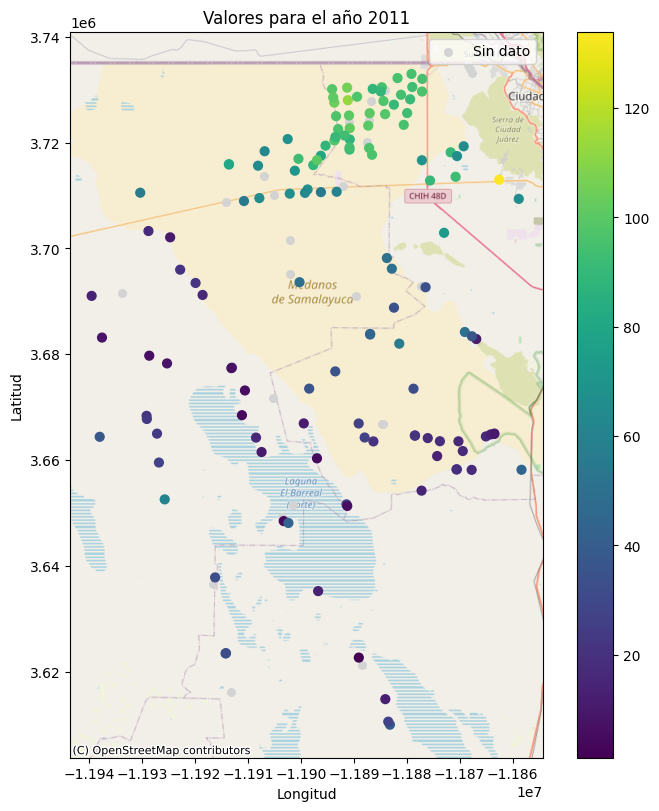

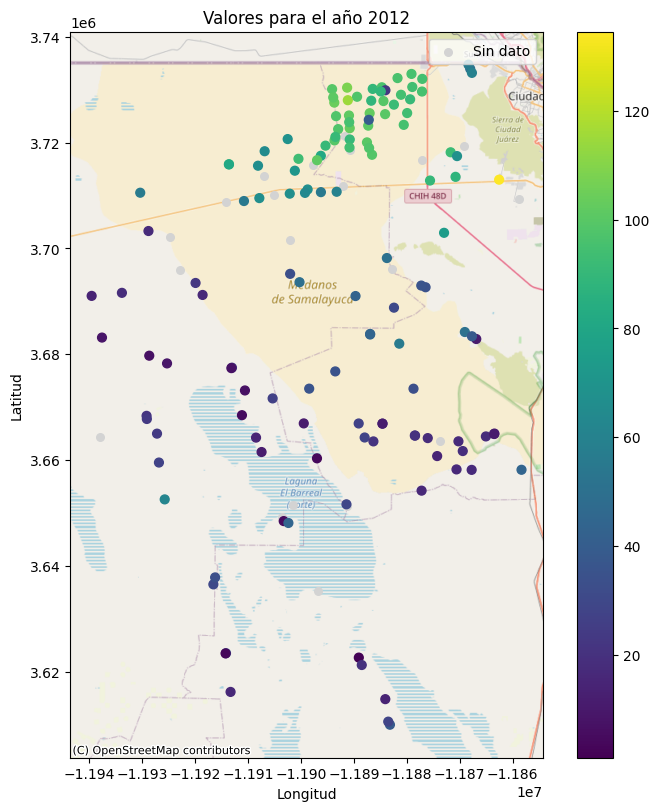

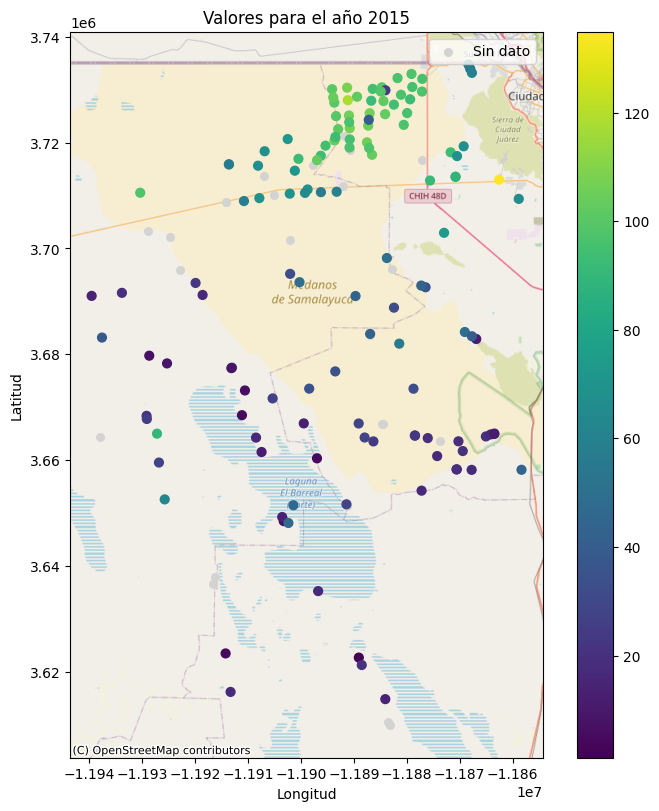

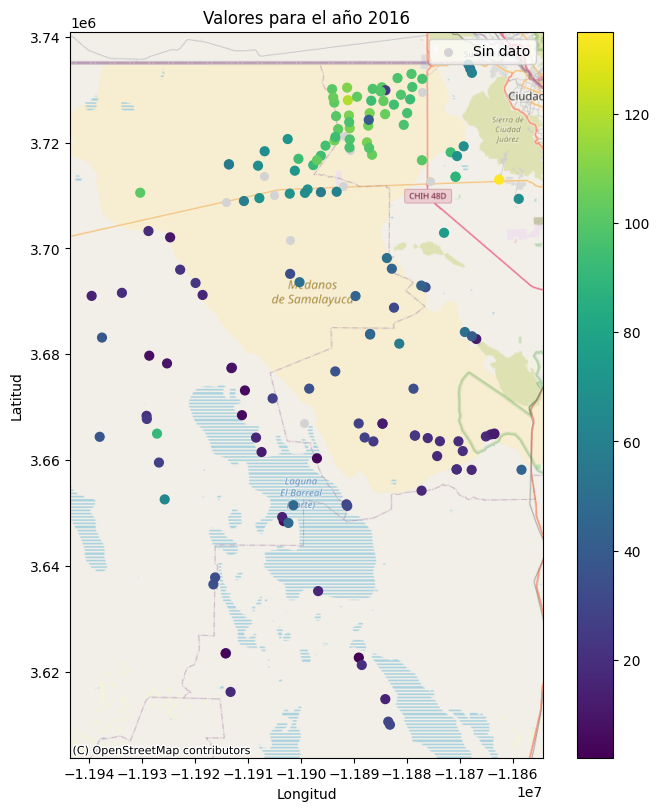

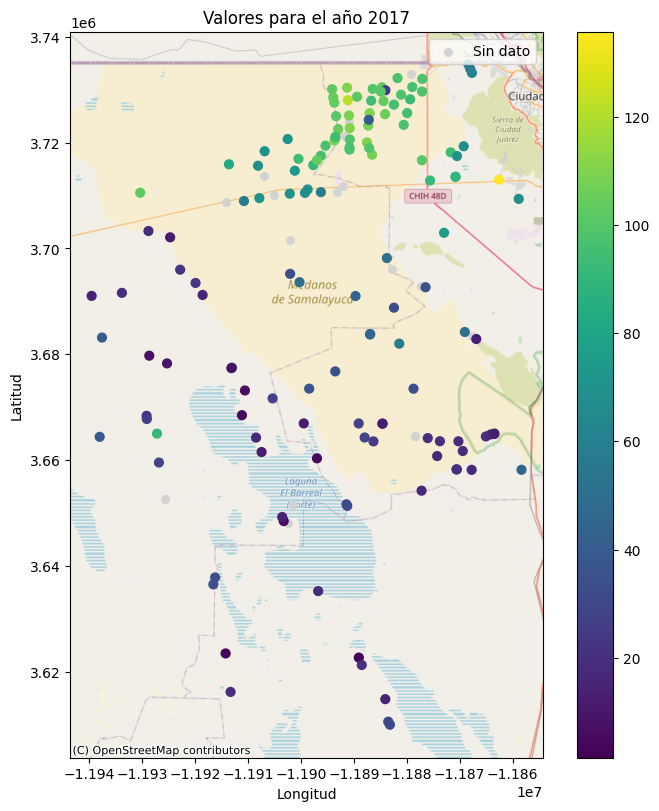

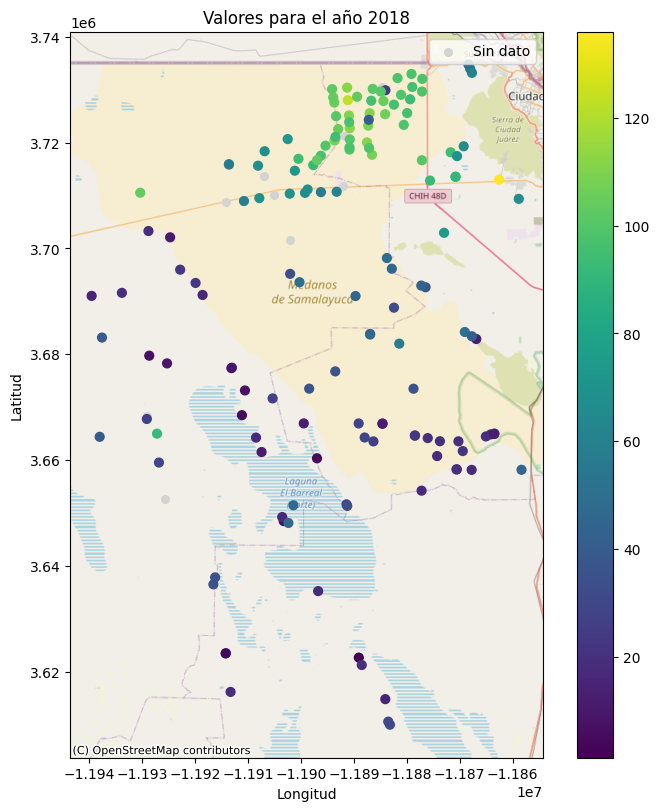

In [13]:
# Suponiendo que gdf ya existe y está en EPSG:4326
for anio in anios:
    col = str(anio)
    if col not in gdf.columns:
        continue

    # Convertir a número
    gdf[col] = pd.to_numeric(gdf[col], errors='coerce')

    # Reproyectar a Web Mercator
    gdf_3857 = gdf.to_crs(epsg=3857)

    # Separar puntos con y sin dato
    gdf_con_dato = gdf_3857[gdf_3857[col].notna() & gdf_3857.geometry.notna()]
    gdf_sin_dato = gdf_3857[gdf_3857[col].isna() & gdf_3857.geometry.notna()]

    fig, ax = plt.subplots(figsize=(8, 8), constrained_layout=True)

    # Puntos sin dato
    if not gdf_sin_dato.empty:
        gdf_sin_dato.plot(ax=ax, color='lightgrey', markersize=30, label='Sin dato')

    # Puntos con dato
    if not gdf_con_dato.empty:
        gdf_con_dato.plot(
            ax=ax,
            column=col,
            cmap='viridis',
            legend=True,
            markersize=40
        )

    # Agregar mapa base
    # ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)  # Satelital
    
    ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)  # Calles
    # ctx.add_basemap (ax, source=ctx.providers.Esri.WorldStreetMap)   # Estilo de calles detallado, similar a Google Maps.

    ax.set_title(f'Valores para el año {anio}')
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')
    ax.legend()
    # Guardar imagen
    ruta_salida = os.path.join(carpeta_salida, f"mapa_{anio}.png")
    plt.savefig(ruta_salida, dpi=300)
    plt.close(fig)

    print(f"✅ Mapa guardado: {ruta_salida}")
    

    plt.show()


###  <span style="color:#cc416d"> Lectura del área de estudio en formato shape  </span>

In [11]:
gdf = gpd.read_file('aol_conejos.shp')
gdf

,OBJECTID,NUM_SEC,CLV_EDO,NOM_EDO,CLV_REGION,NOM_REGION,CLV_ACUI,NOM_ACUI,AREA_KM2,geometry
0,610,647,8,CHIHUAHUA,6,RIO BRAVO,0823,CONEJOS-MEDANOS,6187.14,"POLYGON ((358115.394 3477611.975, 354016.223 3..."


###  <span style="color:#cc416d">Para verificar el sistema de coordenadas </span>

In [12]:
# Transformador de EPSG:3857 -> EPSG:4326 para las etiquetas
transformer = Transformer.from_crs("EPSG:3857", "EPSG:4326", always_xy=True)

In [13]:
# Leer shapefile de límite
gdf_limite = gpd.read_file('aol_conejos.shp')

# Verificamos proyecciones
print("CRS límite:", gdf_limite.crs)
print("CRS puntos:", gdf.crs)

# Transformador EPSG:3857 -> EPSG:4326
transformer = Transformer.from_crs("EPSG:3857", "EPSG:4326", always_xy=True)


CRS límite: EPSG:32613
CRS puntos: EPSG:32613


In [14]:
for anio in anios:
    col = str(anio)
    if col not in gdf.columns:
        print(f"⚠️ Año {anio} no encontrado en columnas, se omite.")
        continue

    gdf[col] = pd.to_numeric(gdf[col], errors='coerce')

    fig, ax = plt.subplots(figsize=(8, 8), constrained_layout=True)

    # Reproyectar a EPSG:3857
    gdf_3857 = gdf.to_crs(epsg=3857)
    gdf_limite_3857 = gdf_limite.to_crs(epsg=3857)

    # Puntos sin dato
    gdf_3857[gdf[col].isna()].plot(ax=ax, color='lightgrey', markersize=30, label='Sin dato')


    # Puntos con dato
    gdf_3857[gdf[col].notna()].plot(
        ax=ax,
        column=col,
        cmap='viridis',
        legend=True,
        legend_kwds={
            'label': "Nivel piezométrico",  # ✅ Texto personalizado
            'orientation': "vertical"
        },
        markersize=40
    )

    # Límite
    gdf_limite_3857.boundary.plot(ax=ax, color='black', linewidth=2)

    # Mapa base
    # ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
    ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)  # Calles
    ctx.add_basemap (ax, source=ctx.providers.Esri.WorldStreetMap)  

    # Coordenadas en grados con 2 decimales y ticks fijos
    xticks = ax.get_xticks()
    yticks = ax.get_yticks()
    ax.xaxis.set_major_locator(FixedLocator(xticks))
    ax.yaxis.set_major_locator(FixedLocator(yticks))
    ax.set_xticklabels([f"{transformer.transform(x, yticks[0])[0]:.2f}" for x in xticks])
    ax.set_yticklabels([f"{transformer.transform(xticks[0], y)[1]:.2f}" for y in yticks])

    ax.set_title(f'Valores para el año {anio}')
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')
    ax.legend()
    
    # Guardar imagen
    ruta_salida = os.path.join(carpeta_salida, f"mapa_{anio}.png")
    plt.savefig(ruta_salida, dpi=300)
    plt.close(fig)  

    print(f"✅ Mapa generado para {anio}")
    plt.show()


⚠️ Año 2005 no encontrado en columnas, se omite.
⚠️ Año 2006 no encontrado en columnas, se omite.
⚠️ Año 2007 no encontrado en columnas, se omite.
⚠️ Año 2009 no encontrado en columnas, se omite.
⚠️ Año 2010 no encontrado en columnas, se omite.
⚠️ Año 2011 no encontrado en columnas, se omite.
⚠️ Año 2012 no encontrado en columnas, se omite.
⚠️ Año 2015 no encontrado en columnas, se omite.
⚠️ Año 2016 no encontrado en columnas, se omite.
⚠️ Año 2017 no encontrado en columnas, se omite.
⚠️ Año 2018 no encontrado en columnas, se omite.
